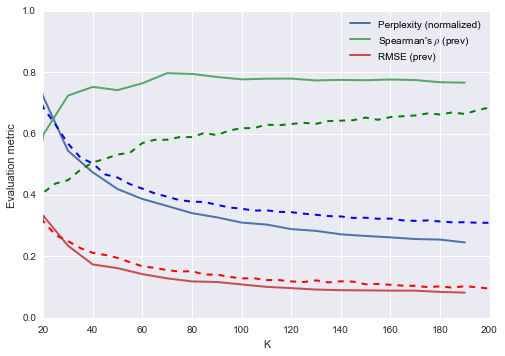

In [2]:
### LDA INTERNAL EVALUATION METRICS

lda_stats = pd.read_table('../GenreModeling/eval_results/basic_lda_final.txt',sep=r"\s*",index_col='K',engine='python')
lda_stats['perplexity'] = lda_stats['perplexity']/lda_stats['perplexity'].max()
lda_stats_2 = pd.read_table('../GenreModeling/eval_results/artist_lda_final.txt',sep=r"\s*",index_col='K',engine='python')
lda_stats_2['perplexity'] = lda_stats_2['perplexity']/lda_stats_2['perplexity'].max()

cols = [col for col in lda_stats_2.columns if ('euclidean' not in col) and ('jsd' not in col) and ('split' not in col)]

ax = lda_stats_2[cols].plot(legend=None,xlim=(20,200),lw=2)
ax.set_ylabel("Evaluation metric")
ax.set_xlabel("K (number of topics)")

lda_stats[cols].plot(legend=None,xlim=(20,200),lw=2,ax=ax,ls='--',color=['blue','green','red'])

handles,labels = ax.get_legend_handles_labels()
l = ax.legend(handles,['Perplexity (normalized)',r"Spearman's $\rho$ (prev)",
                       "RMSE (prev)"])#,r"Spearman's $\rho$ (split)", "RMSE (split)"])
for text in l.get_texts():
    text.set_color("black")

In [19]:
import pandas as pd
import graphlab as gl
import numpy as np
import os,glob
from __future__ import unicode_literals
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy.spatial.distance import cosine,euclidean,squareform
from sklearn.metrics.pairwise import pairwise_distances
import seaborn
colors = seaborn.color_palette()
color = 'black'
# mpl.rcParams['axes.labelcolor'] = color
# mpl.rcParams['axes.labelsize'] = 'x-large'
# mpl.rcParams['figure.figsize'] = (10,8)
# mpl.rcParams['xtick.color'] = color
# mpl.rcParams['ytick.color'] = color
# mpl.rcParams['ytick.labelsize'] = 'x-large'
# mpl.rcParams['xtick.labelsize'] = 'x-large'
# mpl.rcParams['axes.titlesize'] = 'xx-large'
# mpl.rcParams['text.color'] = color
# mpl.rcParams['text.usetex'] = False
# mpl.rcParams['legend.fontsize'] = 'x-large'

artist_ids = {}
with open('../GenreModeling/data/vocab_idx') as fin:
    for line in fin:
        line = line.strip().split()
        artist_ids[int(line[1])] = line[0]

In [3]:
lda_summary = pd.read_table('../GenreModeling/eval_results/knn_lda.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])
mf_summary = pd.read_table('../GenreModeling/eval_results/knn_mf.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])
nmf_summary = pd.read_table('../GenreModeling/eval_results/knn_nmf.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])
lda_summary_artists = pd.read_table('../GenreModeling/eval_results/knn_lda_artists.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])

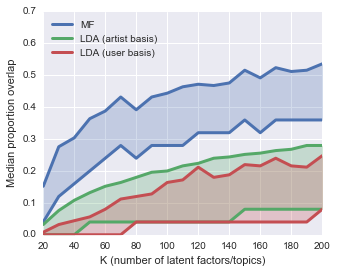

In [4]:
#### MODEL-TO-MODEL OVERLAP

fig,ax = plt.subplots(1,1,figsize=(5,4))

# mf_plot = nmf_summary.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median')
# mf_plot[25].plot(ax=ax,ylim=(0,1),lw=3,c=colors[0],label='MF')#,color=['blue','green','red','cyan','magenta','yellow'])
# mf_plot[250].plot(ax=ax,lw=3,c=colors[0])
# ax.fill_between(np.arange(20,201,10),mf_plot[25],mf_plot[250],color=colors[0],alpha=0.25)

nmf_plot = nmf_summary.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median')
nmf_plot[25].plot(ax=ax,ylim=(0,1),lw=3,c=colors[0],label='MF')#,color=['blue','green','red','cyan','magenta','yellow'])
nmf_plot[250].plot(ax=ax,lw=3,c=colors[0])
ax.fill_between(np.arange(20,201,10),nmf_plot[25],nmf_plot[250],color=colors[0],alpha=0.25)

lda_a_plot = lda_summary_artists.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median')
lda_a_plot[25].plot(ax=ax,lw=3,c=colors[1],label='LDA (artist basis)')
lda_a_plot[250].plot(ax=ax,lw=3,c=colors[1])
ax.fill_between(np.arange(20,201,10),lda_a_plot[25],lda_a_plot[250],color=colors[1],alpha=0.25)

lda_plot = lda_summary.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median')
lda_plot[25].plot(ax=ax,lw=3,c=colors[2],label='LDA (user basis)')
lda_plot[250].plot(ax=ax,lw=3,c=colors[2])
ax.fill_between(np.arange(20,201,10),lda_plot[25],lda_plot[250],color=colors[2],alpha=0.25)

ax.set_ylabel("Median proportion overlap")
ax.set_xlim(20,200)
ax.set_ylim(0,0.7)
ax.set_xlabel("K (number of latent factors/topics)")
handles,labels = ax.get_legend_handles_labels()
l = ax.legend([handles[0],handles[2],handles[4]],[labels[0],labels[2],labels[4]],loc='upper left')

fig.savefig('/Users/jaredlorince/Desktop/stability.pdf',bbox_inches='tight')

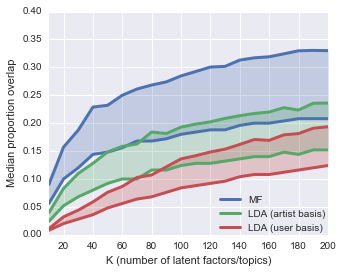

In [5]:
### LAST.FM OVERLAP

fig,ax = plt.subplots(1,1,figsize=(5,4))

mf_poss = nmf_summary.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median']
mf_poss.plot(ax=ax,lw=3,label='MF',color=colors[0],ls='-')
mf_cons = nmf_summary.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median']
mf_cons.plot(ax=ax,lw=3,color=colors[0],ls='-')
ax.fill_between(np.arange(10,201,10),mf_cons,mf_poss,color=colors[0],alpha=0.25)

lda_a_cons = lda_summary_artists.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median']
lda_a_cons.plot(ax=ax,lw=3,label='LDA (artist basis)',c=colors[1],ls='-')
lda_a_poss = lda_summary_artists.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median']
lda_a_poss.plot(ax=ax,lw=3,c=colors[1],ls='-')
ax.fill_between(np.arange(10,201,10),lda_a_cons,lda_a_poss,color=colors[1],alpha=0.25)

lda_cons = lda_summary.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median']
lda_cons.plot(ax=ax,lw=3,label='LDA (user basis)',ls='-',c=colors[2])
lda_poss = lda_summary.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median']
lda_poss.plot(ax=ax,lw=3,ls='-',c=colors[2])
ax.fill_between(np.arange(10,201,10),lda_cons,lda_poss,color=colors[2],alpha=0.25)

ax.set_ylim(0,0.4)
handles,labels = ax.get_legend_handles_labels()
l = ax.legend([handles[0],handles[2],handles[4]],[labels[0],labels[2],labels[4]],loc=(0.6,-0.01))#'lower right')
#for text in l.get_texts():
#    text.set_color("black")
 
ax.set_xticks(np.arange(20,201,20))
#ax.grid()
ax.set_xlabel("K (number of latent factors/topics)")
ax.set_ylabel("Median proportion overlap")

# ax.annotate("LDA (user basis)",(80,0.035),color=colors[2],fontsize='x-large')
# ax.annotate("MF model",(41,0.32),color=colors[0],fontsize='x-large')
# ax.annotate("LDA (artist basis)",(35,0.2),color=colors[1],fontsize='x-large')

fig.savefig('/Users/jaredlorince/Desktop/fm_alignment.pdf',bbox_inches='tight')


In [6]:
### LOAD ARTIST AND PLAYCOUNT DATA

artist_data = pd.read_table('../GenreModeling/data/artist_data',header=None,
                            names=['artist_id','artist_name','scrobbles','listeners'])

playcounts = pd.Series([int(line.strip()) for line in open('../GenreModeling/data/playcounts')])
playcounts.sort(ascending=False)
playcounts = playcounts.reset_index(drop=True)

/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


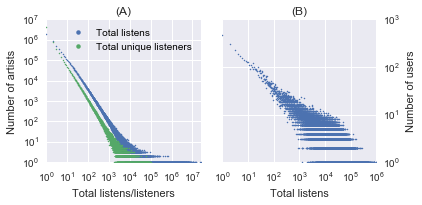

In [7]:
### ARTIST AND LISTENER FREQUENCY DISTRIBUTIONS

fig,axes = plt.subplots(1,2,figsize=(6,3))
ax = axes[0]
artist_data['scrobbles'].value_counts().sort_index().plot(marker='.',ax=ax,
                                                          ls='',loglog=True,label='Total listens',ms=3)
artist_data['listeners'].value_counts().sort_index().plot(marker='.',
                                                          ls='',loglog=True,ax=ax,label='Total unique listeners',ms=3)
ax.set_xlabel('Total listens/listeners')
ax.set_ylabel('Number of artists')
#ax.axvline(100,c='green',ls='--')
#ax.axvline(1000,c='blue',ls='--')
ax.set_title(r"(A)")
l = ax.legend(markerscale=3)
for text in l.get_texts():
    text.set_color("black")
#ax.grid()  

ax = axes[1]
playcounts.value_counts().sort_index().plot(marker='.',ls='',loglog=True,ax=ax,ms=3)
ax.set_xlabel('Total listens')
ax.set_title("(B)")
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_ylabel('Number of users')

plt.tight_layout()
fig.savefig('/Users/jaredlorince/Desktop/freq_dists.png',dpi=400,bbox_inches='tight')

In [8]:
### LOAD AND PROCESS EVALUATION RESULTS

files = glob.glob('../GenreModeling/manual_eval/results_old//*_log')

df_list = []
for f in files:
    df = pd.read_table(f,header=None,names=['ts','artist_a','artist_b','artist_c','ab_dist','bc_dist','agree'])
    iden = f.split('/')[-1].split('_')[0]
    df['iden'] = iden
    df_list.append(df)
raw_eval_data = pd.concat(df_list).drop_duplicates().dropna()
#print eval_data['iden'].value_counts()
#print eval_data['agree'].value_counts()
raw_eval_data = raw_eval_data[raw_eval_data['agree']!=-1]
raw_eval_data['artist_name_a'] = raw_eval_data.apply(lambda row: artist_ids.get(row['artist_a']),axis=1)
raw_eval_data['artist_name_b'] = raw_eval_data.apply(lambda row: artist_ids.get(row['artist_b']),axis=1)
raw_eval_data['artist_name_c'] = raw_eval_data.apply(lambda row: artist_ids.get(row['artist_c']),axis=1)
raw_eval_data['agree'] = raw_eval_data['agree'].apply(lambda x: 0.5 if x==2 else x)
def response_parse(row):
    if row['agree'] == 0.5:
        return '='
    else:
        if (row['ab_dist']>row['bc_dist']):
            if row['agree']==1.:
                response = 'c'
            elif row['agree'] == 0.:
                response = 'a'
        elif (row['ab_dist']<row['bc_dist']):
            if row['agree']==1.:
                response = 'a'
            elif row['agree'] == 0.:
                response = 'c'
    return response

def agree_parse(row):
    if row['response'] == '=':
        return 0.5
    else:
        if (row['ab_dist']>row['bc_dist']):
            if row['response']=='c':
                return 1
            elif row['response'] == 'a':
                return 0
        elif (row['ab_dist']<row['bc_dist']):
            if row['response']=='a':
                return 1
            elif row['response'] == 'c':
                return 0
            
raw_eval_data['response'] = raw_eval_data.apply(response_parse,axis=1)

from scipy.stats import entropy
from numpy.linalg import norm


def process(k,d,method='cosine',gamma=1.):
    processed = raw_eval_data.copy()
    artist_features = np.load("../GenreModeling/data/features/{}/features_{}.npy".format(d,k))
    if method=='jsd':
        def calc_dist(artist_a,artist_b):
            P = artist_features[artist_a]
            Q = artist_features[artist_b]
            _P = P / norm(P, ord=1)
            _Q = Q / norm(Q, ord=1)
            _M = 0.5 * (_P + _Q)
            return np.sqrt(0.5 * (entropy(_P, _M) + entropy(_Q, _M)))
    elif method=='euclidean':
        def calc_dist(artist_a,artist_b):
            return euclidean(artist_features[artist_a],artist_features[artist_b])**2           
    else:
        def calc_dist(artist_a,artist_b):
            return cosine(artist_features[artist_a],artist_features[artist_b])            
    processed['ab_dist'] = processed.apply(lambda row: calc_dist(row['artist_a'],row['artist_b']),axis=1)
    processed['bc_dist'] = processed.apply(lambda row: calc_dist(row['artist_b'],row['artist_c']),axis=1)
    #processed['dist_dif'] = np.clip(np.abs(processed['ab_dist']-processed['bc_dist']),0,1)
    processed['agree'] = processed.apply(agree_parse,axis=1)
    def luce(row):
        #ab = np.exp(max(0,1-row['ab_dist'])/gamma)
        #bc = np.exp(max(0,1-row['bc_dist'])/gamma)
        ab = max(0,1-row['ab_dist'])**gamma
        bc = max(0,1-row['bc_dist'])**gamma
        #ab = max(0.01,1- row['ab_dist'])
        #bc = max(0.01,1- row['bc_dist'])
        if ab==0. and bc==0.:
            return 0.5
        result = max([ab,bc]) / (ab+bc)
        return min(0.999,result)
                                          
    processed['luce'] = processed.apply(luce,axis=1)
    return processed

In [11]:
### MODEL SELECTION TO CHOOSE FEATURE SPACE AND GAMMA

n = float(len(raw_eval_data[raw_eval_data['agree']!=0.5]))
def opt_func(gamma,k,d,method):
    eval_data = process(k,d,method=method,gamma=gamma[0])
    eval_data = eval_data[eval_data['agree']!=0.5]
    def calc_prob_old(row):
        if row['agree']==1:
            return row['luce']
        else:
            return 1 - row['luce']

    return -np.log(eval_data.apply(calc_prob_old,axis=1)).sum()

from scipy.optimize import minimize
for d in ('lda_users','lda_artists','nmf','mf'):
    best = np.inf
    for method in ('euclidean','cosine','jsd'):
        if method=='jsd' and d=='nmf':
            continue
        else:
            for k in np.arange(10,201,10):
                result = minimize(opt_func,x0=[1.],args=(k,d,method),bounds=[(0.,100.)])
                print d,method,k,result.x,result.fun#,eval_data['agree'].sum()/n
                if result.fun < best: 
                    best = result.fun
                    best_method = method
                    best_k=k
                    best_gamma = result.x
    print '----------'
    print d,best_method,best_k,best_gamma
    print '----------'
                    

/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:71: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


lda_users euclidean 10 [ 0.] 1429.26948631
lda_users euclidean 20 [ 0.] 1429.26948631
lda_users euclidean 30 [ 0.] 1429.26948631
lda_users euclidean 40 [ 0.] 1429.26948631
lda_users euclidean 50 [ 0.] 1429.26948631
lda_users euclidean 60 [ 0.] 1429.26948631
lda_users euclidean 70 [ 0.] 1429.26948631
lda_users euclidean 80 [ 0.] 1429.26948631
lda_users euclidean 90 [ 1.71121335] 1388.5934776
lda_users euclidean 100 [ 1.74087283] 1396.83435089
lda_users euclidean 110 [ 1.97947758] 1435.8994122
lda_users euclidean 120 [ 1.80153218] 1428.4591744
lda_users euclidean 130 [ 1.57605929] 1392.87482005
lda_users euclidean 140 [ 2.70656552] 1412.76447576
lda_users euclidean 150 [ 2.43074375] 1379.00532509
lda_users euclidean 160 [ 2.22625045] 1392.13029056
lda_users euclidean 170 [ 3.19780503] 1382.70194139
lda_users euclidean 180 [ 5.44536527] 1360.51090081
lda_users euclidean 190 [ 4.75812039] 1343.88191096
lda_users euclidean 200 [ 4.16459089] 1381.2549098


/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:74: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


lda_users cosine 10 [ 0.01366313] 1424.07832053
lda_users cosine 20 [ 0.02227824] 1418.49846413
lda_users cosine 30 [ 0.01441804] 1426.41294769
lda_users cosine 40 [ 0.03894785] 1414.59955435
lda_users cosine 50 [ 0.08753972] 1387.0889548
lda_users cosine 60 [ 0.09376439] 1397.9625327
lda_users cosine 70 [ 0.17287077] 1360.50344263
lda_users cosine 80 [ 0.20729317] 1354.35166783
lda_users cosine 90 [ 0.27188034] 1317.09928843
lda_users cosine 100 [ 0.30948734] 1311.04475216
lda_users cosine 110 [ 0.29929989] 1308.16277068
lda_users cosine 120 [ 0.28654505] 1325.83425486
lda_users cosine 130 [ 0.32165565] 1316.09769374
lda_users cosine 140 [ 0.29398943] 1329.04645028
lda_users cosine 150 [ 0.32564366] 1313.6022659
lda_users cosine 160 [ 0.38395348] 1288.88560944
lda_users cosine 170 [ 0.45676836] 1258.53313159
lda_users cosine 180 [ 0.3810064] 1291.63515439
lda_users cosine 190 [ 0.4158604] 1277.03348252
lda_users cosine 200 [ 0.40697575] 1284.20162355


/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:63: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:64: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


lda_users jsd 10 [ 0.22594335] 1419.65363963
lda_users jsd 20 [ 0.48735988] 1406.50759778
lda_users jsd 30 [ 0.56773358] 1409.12819276
lda_users jsd 40 [ 0.74845714] 1396.76462417
lda_users jsd 50 [ 1.3398896] 1350.65934033
lda_users jsd 60 [ 1.35264615] 1364.64091405
lda_users jsd 70 [ 1.67024971] 1338.90293689
lda_users jsd 80 [ 1.90641987] 1334.76214589
lda_users jsd 90 [ 2.16266159] 1311.45376333
lda_users jsd 100 [ 2.31766701] 1303.52077318
lda_users jsd 110 [ 2.49755396] 1288.61299729
lda_users jsd 120 [ 2.31355022] 1315.97661803
lda_users jsd 130 [ 2.57249351] 1302.79627858
lda_users jsd 140 [ 2.55687069] 1304.94083761
lda_users jsd 150 [ 2.58763398] 1303.93632387
lda_users jsd 160 [ 2.86284699] 1280.20095039
lda_users jsd 170 [ 3.07910072] 1265.19752012
lda_users jsd 180 [ 2.74424344] 1285.88767623
lda_users jsd 190 [ 2.90673135] 1283.91703782
lda_users jsd 200 [ 2.86080673] 1284.403129
----------
lda_users cosine 170 [ 0.45676836]
----------
lda_artists euclidean 10 [ 39.49422

/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:74: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


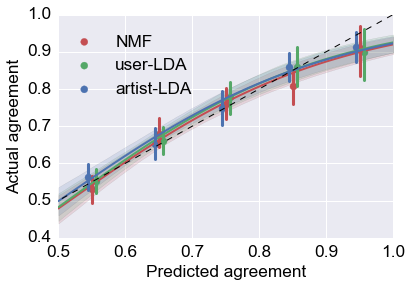

In [15]:
### LOGSITIC REGRESSION PLOTS OF EVALUATION RESULTS

# fig = plt.figure(figsize=(5,4)) 
# gs = mpl.gridspec.GridSpec(2,1, height_ratios=[1,3],hspace=0.05) 
# ax0 = plt.subplot(gs[0])
# ax1 = plt.subplot(gs[1])
# ax0.set_yticks([])
# ax0.set_xticks(np.arange(0.5,1.,0.1))
# ax0.set_xlim(0.5,1.)
# ax0.set_ylim(0,4.)
# ax0.set_xticklabels([])
# ax0.set_yticklabels([])

fig,ax1 = plt.subplots(1,1,figsize=(6,4))

bins = bins = np.array([.55,.65,.75,.85,.95])

    #nmf 130 [ 1.0547198] 1249.91169716
eval_data = process(130,'nmf',gamma=1.0547198)
eval_data = eval_data[eval_data['agree']!=0.5]
seaborn.regplot(x='luce',y='agree',data=eval_data,logistic=True,ax=ax1,color=colors[2],line_kws={'lw':2,'ls':'-'},x_bins=bins,label='NMF')#, ci=None)
#seaborn.kdeplot(eval_data['luce'],ax=ax0,color=colors[2],shade=True,legend=None)
#log_prob_nmf = np.log(eval_data.apply(calc_prob_old,axis=1)).sum()

#lda_users 170 [ 0.45676836] 1258.53313159
eval_data = process(170,'lda_users',gamma=0.45676836)
eval_data = eval_data[eval_data['agree']!=0.5]
seaborn.regplot(x='luce',y='agree',data=eval_data,logistic=True,ax=ax1,color=colors[1],line_kws={'lw':2,'ls':'-'},x_bins=bins+0.006,label='user-LDA')#, ci=None)
#seaborn.kdeplot(eval_data['luce'],ax=ax0,color=colors[1],shade=True,legend=None)
#log_prob_lda_u = np.log(eval_data.apply(calc_prob_old,axis=1)).sum()

#lda_artists 190 [ 0.75677536] 1200.5009065
eval_data = process(190,'lda_artists',gamma=.75677536)
eval_data = eval_data[eval_data['agree']!=0.5]
seaborn.regplot(x='luce',y='agree',data=eval_data,logistic=True,ax=ax1,color=colors[0],line_kws={'lw':2,'ls':'-'},x_bins=bins-0.006,label='artist-LDA')#,ci=None)
#seaborn.kdeplot(eval_data['luce'],ax=ax0,color=colors[0],shade=True,legend=None)
#log_prob_lda_a = np.log(eval_data.apply(calc_prob_old,axis=1)).sum()


# eval_data = process(70,'mf')
# eval_data = eval_data[eval_data['agree']!=0.5]
# seaborn.regplot(x='luce',y='agree',data=eval_data,logistic=False,ax=ax1,color=colors[3],line_kws={'lw':3,'ls':'-'},x_bins=bins+0.003,label='MF',ci=None)
# seaborn.kdeplot(eval_data['luce'],ax=ax0,color=colors[3],shade=True,legend=None)
# log_prob_mf = np.log(eval_data.apply(calc_prob,axis=1)).sum()


ax1.plot(np.arange(0,1.,0.001),np.arange(0,1.,0.001),ls='--',lw=1,c='k')



#ax1.set_xlabel("|dist(A,B) - dist(A,C)|")
ax1.set_xlabel("Predicted agreement")
ax1.set_ylabel("Actual agreement")
ax1.set_ylim(0.4,1.)
ax1.set_xlim(0.5,1.)
#ax1.axhline(0.5,ls='--',c='k',lw=1)
ax1.legend(loc=(0.005,0.6))
#ax1.legend(loc='upper left')
#plt.tight_layout()
fig.savefig('/Users/jaredlorince/Desktop/human_eval.pdf',bbox_inches='tight')


In [375]:
### OVERALL ACCURACY VALUES

eval_data = process(130,'nmf',gamma=1.0547198)
eval_data = eval_data[eval_data['agree']!=0.5]
print eval_data['agree'].sum() / len(eval_data)

eval_data = process(170,'lda_users',gamma=0.45676836)
eval_data = eval_data[eval_data['agree']!=0.5]
print eval_data['agree'].sum() / len(eval_data)

eval_data = process(190,'lda_artists',gamma=.75677536)
eval_data = eval_data[eval_data['agree']!=0.5]
print eval_data['agree'].sum() / len(eval_data)

/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:71: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0.66537342386
0.662463627546
0.689621726479


In [99]:
### PAIRWISE DISTANCES TO CALCUALTE t-SNE VALUES IN MATLAB
features = np.load("../GenreModeling/data/features/lda_artists/features_190.npy")[:10000]
result = pairwise_distances(features,n_jobs=-1,metric='cosine')
savemat('/Users/jaredlorince/Downloads/tSNE_matlab/cosine_dists_userlda.mat', {'vect':result})

In [123]:
r =  np.random.random((20000,190))
dists_rand = pairwise_distances(r,n_jobs=-1,metric='cosine')
dists_rand = squareform(dists_rand,checks=False)


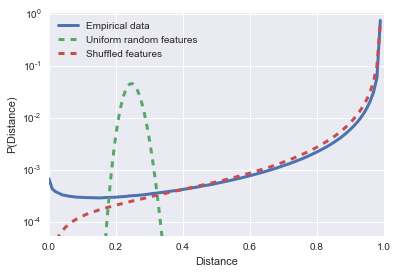

In [128]:
### COMPARISON OF PAIRWISE DISTRIBUTION TO RANDOM DISTRIBUTION
# (calculated overall distribution on glcoud -- see MusicForaging/GenreModeling/data/features/dist_hists)

fig,ax = plt.subplots(1,1,figsize=(6,4)) 

#LDA_ARTISTS_190
vals = np.array([   4342753,    2758452,    2434665,    2270920,    2119709,
           2053162,    1994882,    1959337,    1922705,    1902288,
           1892866,    1877421,    1874083,    1863723,    1855462,
           1848945,    1858331,    1880124,    1885812,    1897222,
           1909679,    1934086,    1953834,    1976167,    2017680,
           2040936,    2055491,    2083537,    2114419,    2150655,
           2194120,    2249111,    2272493,    2325087,    2367554,
           2416725,    2462583,    2521404,    2563512,    2604851,
           2695256,    2756445,    2803826,    2894250,    2966537,
           3045467,    3137236,    3217953,    3304613,    3385283,
           3506152,    3615489,    3728879,    3852848,    3975249,
           4116942,    4259982,    4393669,    4565893,    4735051,
           4915565,    5110184,    5321361,    5547708,    5769763,
           6032755,    6311907,    6592631,    6909088,    7272294,
           7651405,    8037407,    8455851,    8947049,    9463686,
          10038235,   10639318,   11368439,   12177132,   13061843,
          13993426,   15108871,   16321123,   17704801,   19340160,
          21231759,   23451017,   26002047,   29150575,   33027722,
          37754887,   43726235,   51365334,   61695357,   76175502,
          97892818,  133218950,  199894983,  374721579, 4697871943])
bins = np.array([  2.04281037e-14,   9.99999419e-03,   1.99999884e-02,
          2.99999826e-02,   3.99999768e-02,   4.99999709e-02,
          5.99999651e-02,   6.99999593e-02,   7.99999535e-02,
          8.99999477e-02,   9.99999419e-02,   1.09999936e-01,
          1.19999930e-01,   1.29999924e-01,   1.39999919e-01,
          1.49999913e-01,   1.59999907e-01,   1.69999901e-01,
          1.79999895e-01,   1.89999890e-01,   1.99999884e-01,
          2.09999878e-01,   2.19999872e-01,   2.29999866e-01,
          2.39999861e-01,   2.49999855e-01,   2.59999849e-01,
          2.69999843e-01,   2.79999837e-01,   2.89999831e-01,
          2.99999826e-01,   3.09999820e-01,   3.19999814e-01,
          3.29999808e-01,   3.39999802e-01,   3.49999797e-01,
          3.59999791e-01,   3.69999785e-01,   3.79999779e-01,
          3.89999773e-01,   3.99999768e-01,   4.09999762e-01,
          4.19999756e-01,   4.29999750e-01,   4.39999744e-01,
          4.49999738e-01,   4.59999733e-01,   4.69999727e-01,
          4.79999721e-01,   4.89999715e-01,   4.99999709e-01,
          5.09999704e-01,   5.19999698e-01,   5.29999692e-01,
          5.39999686e-01,   5.49999680e-01,   5.59999675e-01,
          5.69999669e-01,   5.79999663e-01,   5.89999657e-01,
          5.99999651e-01,   6.09999646e-01,   6.19999640e-01,
          6.29999634e-01,   6.39999628e-01,   6.49999622e-01,
          6.59999616e-01,   6.69999611e-01,   6.79999605e-01,
          6.89999599e-01,   6.99999593e-01,   7.09999587e-01,
          7.19999582e-01,   7.29999576e-01,   7.39999570e-01,
          7.49999564e-01,   7.59999558e-01,   7.69999553e-01,
          7.79999547e-01,   7.89999541e-01,   7.99999535e-01,
          8.09999529e-01,   8.19999523e-01,   8.29999518e-01,
          8.39999512e-01,   8.49999506e-01,   8.59999500e-01,
          8.69999494e-01,   8.79999489e-01,   8.89999483e-01,
          8.99999477e-01,   9.09999471e-01,   9.19999465e-01,
          9.29999460e-01,   9.39999454e-01,   9.49999448e-01,
          9.59999442e-01,   9.69999436e-01,   9.79999431e-01,
          9.89999425e-01,   9.99999419e-01])

vals_rand = np.array([     40004,     148628,     256175,     348228,     432035,
            509430,     583079,     646723,     710901,     765962,
            825131,     884151,     937839,     981432,    1035349,
           1089190,    1137930,    1188221,    1236733,    1284930,
           1336102,    1392643,    1445427,    1499205,    1555969,
           1615152,    1670035,    1725759,    1790192,    1853472,
           1923045,    1992378,    2062262,    2136439,    2209574,
           2281425,    2361294,    2440155,    2523244,    2601551,
           2688950,    2773621,    2876105,    2971190,    3064920,
           3174165,    3278504,    3390234,    3501611,    3618931,
           3746611,    3873817,    4020932,    4169439,    4333615,
           4505350,    4688358,    4888540,    5088957,    5302475,
           5515740,    5766606,    6030219,    6311101,    6590870,
           6890886,    7237882,    7622816,    8037021,    8466289,
           8948310,    9448232,   10014803,   10635273,   11319009,
          12079591,   12906839,   13822870,   14837435,   15993182,
          17282727,   18757879,   20478486,   22412544,   24628130,
          27221771,   30307647,   33994885,   38472278,   43987632,
          50944662,   59807190,   71483335,   87426417,  110106496,
         144992161,  203553286,  318828480,  635119022, 4029242795])

bins_rand=  np.array([  1.41707094e-04,   1.01401180e-02,   2.01385289e-02,
          3.01369398e-02,   4.01353507e-02,   5.01337616e-02,
          6.01321725e-02,   7.01305834e-02,   8.01289943e-02,
          9.01274052e-02,   1.00125816e-01,   1.10124227e-01,
          1.20122638e-01,   1.30121049e-01,   1.40119460e-01,
          1.50117871e-01,   1.60116282e-01,   1.70114692e-01,
          1.80113103e-01,   1.90111514e-01,   2.00109925e-01,
          2.10108336e-01,   2.20106747e-01,   2.30105158e-01,
          2.40103569e-01,   2.50101980e-01,   2.60100391e-01,
          2.70098802e-01,   2.80097212e-01,   2.90095623e-01,
          3.00094034e-01,   3.10092445e-01,   3.20090856e-01,
          3.30089267e-01,   3.40087678e-01,   3.50086089e-01,
          3.60084500e-01,   3.70082911e-01,   3.80081321e-01,
          3.90079732e-01,   4.00078143e-01,   4.10076554e-01,
          4.20074965e-01,   4.30073376e-01,   4.40071787e-01,
          4.50070198e-01,   4.60068609e-01,   4.70067020e-01,
          4.80065430e-01,   4.90063841e-01,   5.00062252e-01,
          5.10060663e-01,   5.20059074e-01,   5.30057485e-01,
          5.40055896e-01,   5.50054307e-01,   5.60052718e-01,
          5.70051129e-01,   5.80049540e-01,   5.90047950e-01,
          6.00046361e-01,   6.10044772e-01,   6.20043183e-01,
          6.30041594e-01,   6.40040005e-01,   6.50038416e-01,
          6.60036827e-01,   6.70035238e-01,   6.80033649e-01,
          6.90032059e-01,   7.00030470e-01,   7.10028881e-01,
          7.20027292e-01,   7.30025703e-01,   7.40024114e-01,
          7.50022525e-01,   7.60020936e-01,   7.70019347e-01,
          7.80017758e-01,   7.90016169e-01,   8.00014579e-01,
          8.10012990e-01,   8.20011401e-01,   8.30009812e-01,
          8.40008223e-01,   8.50006634e-01,   8.60005045e-01,
          8.70003456e-01,   8.80001867e-01,   8.90000278e-01,
          8.99998688e-01,   9.09997099e-01,   9.19995510e-01,
          9.29993921e-01,   9.39992332e-01,   9.49990743e-01,
          9.59989154e-01,   9.69987565e-01,   9.79985976e-01,
          9.89984387e-01,   9.99982797e-01])



vals =  vals / float(vals.sum())
ax.plot(bins[:-1],vals,lw=3,label='Empirical data',c=colors[0])

vals,bins2 = np.histogram(dists_rand,100)
vals =  vals / float(vals.sum())
ax.plot(bins2[:-1],vals,lw=3,label='Uniform random features',c=colors[1],ls='--')

vals_rand =  vals_rand / float(vals_rand.sum())
ax.plot(bins_rand[:-1],vals_rand,lw=3,label='Shuffled features',c=colors[2],ls='--')



ax.set_yscale('log')
#ax.set_xlim(0,bins[-2])
ax.set_xlim(0,1)
ax.set_xlabel('Distance')#,fontsize='large')
ax.set_ylabel('P(Distance)')#,fontsize='large')
ax.set_ylim(0.000055,1.05)

ax.legend(loc='upper left')
fig.savefig('/Users/jaredlorince/Desktop/dists.pdf',bbox_inches='tight')

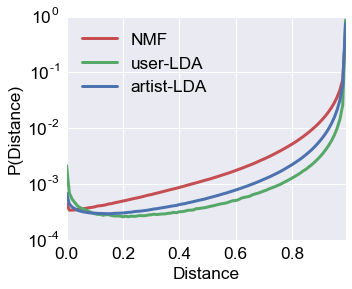

In [87]:
### COMPARISON OF PAIRWISE DISTANCE DISTRIBUTIONS ACROSS MODEL TYPES

fig,ax = plt.subplots(1,1,figsize=(5,4)) 

#NMF 130
vals = np. array([   2867168,    2139871,    2146426,    2160893,    2213400,
           2247325,    2273333,    2317402,    2373381,    2403010,
           2456521,    2542482,    2570482,    2617138,    2679963,
           2769069,    2808691,    2899355,    2969477,    3042020,
           3122765,    3193774,    3287964,    3376753,    3470198,
           3546686,    3645388,    3746541,    3864583,    3985608,
           4069762,    4199575,    4323368,    4444431,    4584396,
           4717321,    4869098,    5010935,    5152986,    5298773,
           5467150,    5643542,    5822575,    6025499,    6228319,
           6429241,    6622721,    6843290,    7073288,    7325976,
           7550411,    7794093,    8090831,    8375283,    8705620,
           9033823,    9381676,    9739452,   10122134,   10542266,
          11004784,   11490207,   11978940,   12539644,   13130330,
          13731038,   14381722,   15124855,   15927523,   16797838,
          17680885,   18625544,   19669005,   20840168,   22119259,
          23532070,   24999978,   26679025,   28498581,   30489280,
          32671846,   35138707,   37948921,   41172555,   44779146,
          48890510,   53600681,   59092497,   65442267,   72916859,
          82196800,   93259933,  106846307,  124375413,  147559941,
         179021584,  226281571,  304705267,  466999489, 3429570044])

bins = np.array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
         0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
         0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
         0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
         0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
         0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
         0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
         0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
         0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
         0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
         0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,
         0.99,  1.  ])
    
vals =  vals / float(vals.sum())

ax.plot(bins[:-1],vals,lw=3,label='NMF',c=colors[2])       

#LDA_USERS_170
vals = np.array([  13504183,    4322167,    3369307,    2897733,    2524454,
           2353126,    2227639,    2144921,    2035405,    1928182,
           1849145,    1801480,    1793772,    1733230,    1779602,
           1778820,    1711038,    1687892,    1685557,    1682096,
           1628214,    1670730,    1635942,    1671319,    1655711,
           1683291,    1717604,    1702075,    1712584,    1753812,
           1774678,    1816022,    1786694,    1811836,    1833971,
           1837561,    1881532,    1895176,    1958211,    1927682,
           2003927,    2016445,    2057250,    2125921,    2143127,
           2157242,    2277689,    2286072,    2337464,    2372624,
           2431925,    2509358,    2562035,    2644168,    2718318,
           2794570,    2838081,    2916441,    3041204,    3164383,
           3180411,    3301488,    3505623,    3623001,    3705786,
           3808955,    4050217,    4191284,    4328430,    4500013,
           4726704,    4917963,    5195064,    5418839,    5667843,
           5965349,    6273072,    6686672,    7072843,    7536476,
           8062403,    8590952,    9228759,    9931857,   10834432,
          11605696,   12803184,   13941752,   15504224,   17355182,
          19579630,   22398468,   26173185,   30940197,   37400687,
          47097757,   62599732,   90944002,  163275029, 5451450717])
bins = np.array([ -8.88178420e-16,   9.99999868e-03,   1.99999974e-02,
          2.99999961e-02,   3.99999947e-02,   4.99999934e-02,
          5.99999921e-02,   6.99999908e-02,   7.99999895e-02,
          8.99999882e-02,   9.99999868e-02,   1.09999986e-01,
          1.19999984e-01,   1.29999983e-01,   1.39999982e-01,
          1.49999980e-01,   1.59999979e-01,   1.69999978e-01,
          1.79999976e-01,   1.89999975e-01,   1.99999974e-01,
          2.09999972e-01,   2.19999971e-01,   2.29999970e-01,
          2.39999968e-01,   2.49999967e-01,   2.59999966e-01,
          2.69999964e-01,   2.79999963e-01,   2.89999962e-01,
          2.99999961e-01,   3.09999959e-01,   3.19999958e-01,
          3.29999957e-01,   3.39999955e-01,   3.49999954e-01,
          3.59999953e-01,   3.69999951e-01,   3.79999950e-01,
          3.89999949e-01,   3.99999947e-01,   4.09999946e-01,
          4.19999945e-01,   4.29999943e-01,   4.39999942e-01,
          4.49999941e-01,   4.59999939e-01,   4.69999938e-01,
          4.79999937e-01,   4.89999936e-01,   4.99999934e-01,
          5.09999933e-01,   5.19999932e-01,   5.29999930e-01,
          5.39999929e-01,   5.49999928e-01,   5.59999926e-01,
          5.69999925e-01,   5.79999924e-01,   5.89999922e-01,
          5.99999921e-01,   6.09999920e-01,   6.19999918e-01,
          6.29999917e-01,   6.39999916e-01,   6.49999914e-01,
          6.59999913e-01,   6.69999912e-01,   6.79999911e-01,
          6.89999909e-01,   6.99999908e-01,   7.09999907e-01,
          7.19999905e-01,   7.29999904e-01,   7.39999903e-01,
          7.49999901e-01,   7.59999900e-01,   7.69999899e-01,
          7.79999897e-01,   7.89999896e-01,   7.99999895e-01,
          8.09999893e-01,   8.19999892e-01,   8.29999891e-01,
          8.39999889e-01,   8.49999888e-01,   8.59999887e-01,
          8.69999885e-01,   8.79999884e-01,   8.89999883e-01,
          8.99999882e-01,   9.09999880e-01,   9.19999879e-01,
          9.29999878e-01,   9.39999876e-01,   9.49999875e-01,
          9.59999874e-01,   9.69999872e-01,   9.79999871e-01,
          9.89999870e-01,   9.99999868e-01])          
vals =  vals / float(vals.sum())

ax.plot(bins[:-1],vals,lw=3,label='user-LDA',c=colors[1])

#LDA_ARTISTS_190
vals = np.array([   4342753,    2758452,    2434665,    2270920,    2119709,
           2053162,    1994882,    1959337,    1922705,    1902288,
           1892866,    1877421,    1874083,    1863723,    1855462,
           1848945,    1858331,    1880124,    1885812,    1897222,
           1909679,    1934086,    1953834,    1976167,    2017680,
           2040936,    2055491,    2083537,    2114419,    2150655,
           2194120,    2249111,    2272493,    2325087,    2367554,
           2416725,    2462583,    2521404,    2563512,    2604851,
           2695256,    2756445,    2803826,    2894250,    2966537,
           3045467,    3137236,    3217953,    3304613,    3385283,
           3506152,    3615489,    3728879,    3852848,    3975249,
           4116942,    4259982,    4393669,    4565893,    4735051,
           4915565,    5110184,    5321361,    5547708,    5769763,
           6032755,    6311907,    6592631,    6909088,    7272294,
           7651405,    8037407,    8455851,    8947049,    9463686,
          10038235,   10639318,   11368439,   12177132,   13061843,
          13993426,   15108871,   16321123,   17704801,   19340160,
          21231759,   23451017,   26002047,   29150575,   33027722,
          37754887,   43726235,   51365334,   61695357,   76175502,
          97892818,  133218950,  199894983,  374721579, 4697871943])
bins = np.array([  2.04281037e-14,   9.99999419e-03,   1.99999884e-02,
          2.99999826e-02,   3.99999768e-02,   4.99999709e-02,
          5.99999651e-02,   6.99999593e-02,   7.99999535e-02,
          8.99999477e-02,   9.99999419e-02,   1.09999936e-01,
          1.19999930e-01,   1.29999924e-01,   1.39999919e-01,
          1.49999913e-01,   1.59999907e-01,   1.69999901e-01,
          1.79999895e-01,   1.89999890e-01,   1.99999884e-01,
          2.09999878e-01,   2.19999872e-01,   2.29999866e-01,
          2.39999861e-01,   2.49999855e-01,   2.59999849e-01,
          2.69999843e-01,   2.79999837e-01,   2.89999831e-01,
          2.99999826e-01,   3.09999820e-01,   3.19999814e-01,
          3.29999808e-01,   3.39999802e-01,   3.49999797e-01,
          3.59999791e-01,   3.69999785e-01,   3.79999779e-01,
          3.89999773e-01,   3.99999768e-01,   4.09999762e-01,
          4.19999756e-01,   4.29999750e-01,   4.39999744e-01,
          4.49999738e-01,   4.59999733e-01,   4.69999727e-01,
          4.79999721e-01,   4.89999715e-01,   4.99999709e-01,
          5.09999704e-01,   5.19999698e-01,   5.29999692e-01,
          5.39999686e-01,   5.49999680e-01,   5.59999675e-01,
          5.69999669e-01,   5.79999663e-01,   5.89999657e-01,
          5.99999651e-01,   6.09999646e-01,   6.19999640e-01,
          6.29999634e-01,   6.39999628e-01,   6.49999622e-01,
          6.59999616e-01,   6.69999611e-01,   6.79999605e-01,
          6.89999599e-01,   6.99999593e-01,   7.09999587e-01,
          7.19999582e-01,   7.29999576e-01,   7.39999570e-01,
          7.49999564e-01,   7.59999558e-01,   7.69999553e-01,
          7.79999547e-01,   7.89999541e-01,   7.99999535e-01,
          8.09999529e-01,   8.19999523e-01,   8.29999518e-01,
          8.39999512e-01,   8.49999506e-01,   8.59999500e-01,
          8.69999494e-01,   8.79999489e-01,   8.89999483e-01,
          8.99999477e-01,   9.09999471e-01,   9.19999465e-01,
          9.29999460e-01,   9.39999454e-01,   9.49999448e-01,
          9.59999442e-01,   9.69999436e-01,   9.79999431e-01,
          9.89999425e-01,   9.99999419e-01])


vals =  vals / float(vals.sum())

ax.plot(bins[:-1],vals,lw=3,label='artist-LDA',c=colors[0])

ax.set_yscale('log')
ax.set_xlim(0,bins[-2])
ax.set_xlabel('Distance')
ax.set_ylabel('P(Distance)')
#ax.set_ylim(10e-5,1.05)
ax.legend(loc='upper left')

In [2]:
# fil's idea



In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(features, 'average',metric='cosine')

In [7]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(features))
c

0.34377880428664909

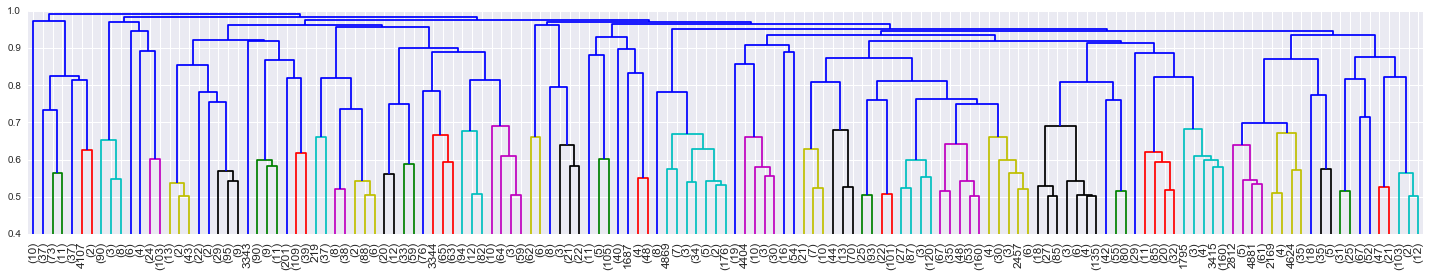

In [54]:
fig,ax = plt.subplots(1,1,figsize=(25,4))

dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=143,  # show only the last p merged clusters
    show_leaf_counts=True,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=False,  # to get a distribution impression in truncated branches
    ax=ax
);
ax.set_ylim(0.4,1.);

In [62]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.5
clusters = fcluster(Z, .7, criterion='distance')

In [85]:
within = []
between = []
for i in xrange(1,clusters.max()+1):
    within += list(squareform(pairwise_distances(features[np.where(clusters==i)[0]]),checks=False))
    for f in features[np.where(clusters==i)[0]]:
        for f2 in features[np.where(clusters!=i)[0]]:
            between.append(cosine(f,f2))


KeyboardInterrupt: 

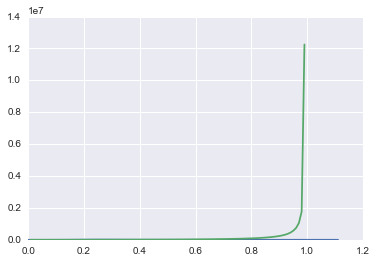

In [86]:
fig,ax = plt.subplots(1,1)
vals,bins = np.histogram(within,bins=100)
plt.plot(bins[:-1],vals,c=colors[0])
vals,bins = np.histogram(between,bins=100)
plt.plot(bins[:-1],vals,c=colors[1])


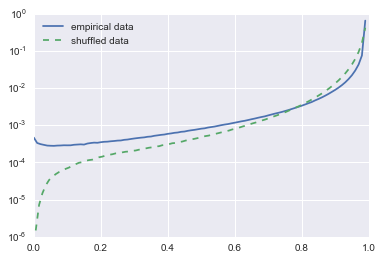

In [120]:
features = np.load('../GenreModeling/data/features/lda_artists/features_190.npy')[:10000]
distances1 = squareform(pairwise_distances(features,metric='cosine'),checks=False)
vals1,bins1 = np.histogram(distances1,bins=100)
for i in xrange(features.shape[1]):
    np.random.shuffle(features[:,i])
distances2 = squareform(pairwise_distances(features,metric='cosine'),checks=False)
vals2,bins2 = np.histogram(distances2,bins=100)

fig,ax = plt.subplots(1,1)
vals1 = vals1 / float(vals1.sum())
vals2 = vals2 / float(vals2.sum())
ax.plot(bins1[:-1],vals1,c=colors[0],label='empirical data')
ax.plot(bins2[:-1],vals2,c=colors[1],ls='--',label='shuffled data')
ax.set_yscale('log')
ax.legend(loc='upper left')

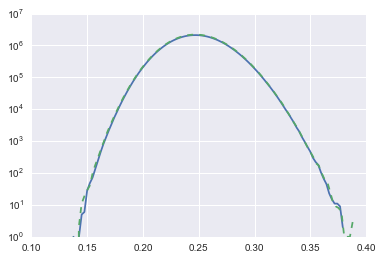

In [115]:
features_rand = np.random.random((10000,190))
distances1 = squareform(pairwise_distances(features_rand,metric='cosine'),checks=False)
vals1,bins1 = np.histogram(distances1,bins=100)
for i in xrange(features_rand.shape[1]):
    np.random.shuffle(features_rand[:,i])
distances2 = squareform(pairwise_distances(features_rand,metric='cosine'),checks=False)
vals2,bins2 = np.histogram(distances2,bins=100)

fig,ax = plt.subplots(1,1)
ax.plot(bins1[:-1],vals1,c=colors[0])
ax.plot(bins2[:-1],vals2,c=colors[1],ls='--')
ax.set_yscale('log')

In [107]:
features = np.load('../GenreModeling/data/features/lda_artists/features_190.npy')[:10000]
distances1 = squareform(pairwise_distances(features,metric='cosine'),checks=False)
vals1,bins1 = np.histogram(distances1,bins=100)
for i in xrange(features.shape[1]):
    np.random.shuffle(features[:,i])

190